In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories

In [5]:
# Crosstab Analysis
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Are there categories where being a best-seller is more prevalent?
crosstab_proportions = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_sorted = crosstab_proportions.sort_values(by=True, ascending=False)
crosstab_sorted.head(10)


isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
"Billiard, Snooker & Pool",0.967871,0.032129
Pet Supplies,0.969800,0.030200
Home Brewing & Wine Making,0.971545,0.028455
Wind Instruments,0.972000,0.028000


In [6]:
# Chi-square Test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print(f"Chi.square: {chi2_statistic}, P_values {chi2_p_value}")
#significant difference between the observed and expected frequencies, there is likely an association between the category and isBestSeller variables.
#strong evidence to reject the null hypothesis p-value is 0.0

Chi.square: 36540.20270061387, P_values 0.0


In [7]:
# Cramér's V
cramers_v = association(crosstab, method="cramer")
print(f"Cramér's V: {cramers_v}")

#association between product categories and best-seller status is weak (0.11 to 0.30)

Cramér's V: 0.1222829439760564


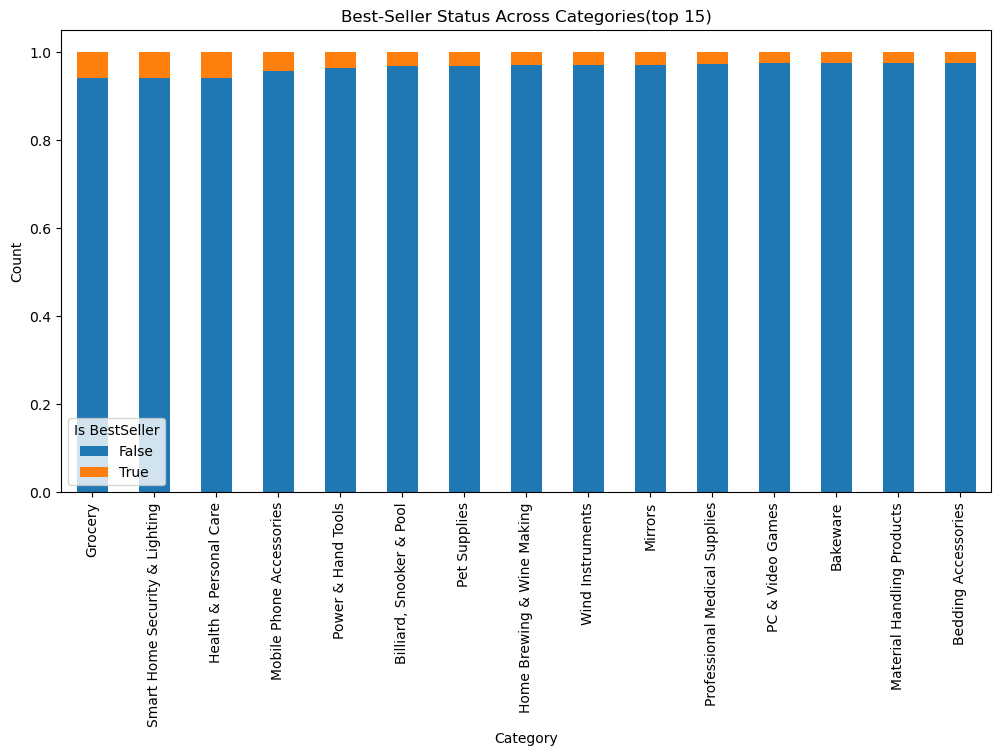

In [8]:
# Visualization
crosstab_top = crosstab_sorted.head(15)
crosstab_bottom = crosstab_sorted.tail(15)
crosstab_top.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Best-Seller Status Across Categories(top 15)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Is BestSeller')
plt.show()

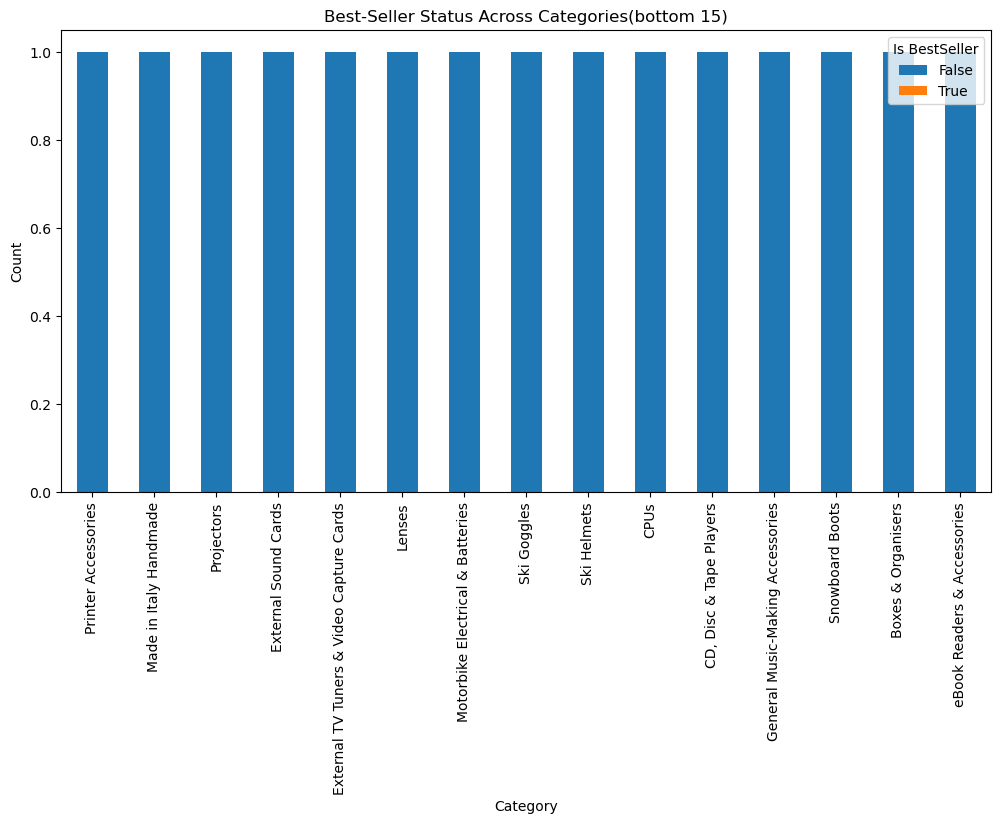

In [9]:
crosstab_bottom.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Best-Seller Status Across Categories(bottom 15)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Is BestSeller')
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [10]:
# Remove Outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

C:\Users\valer\AppData\Local\Temp\ipykernel_45764\1353707362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)],


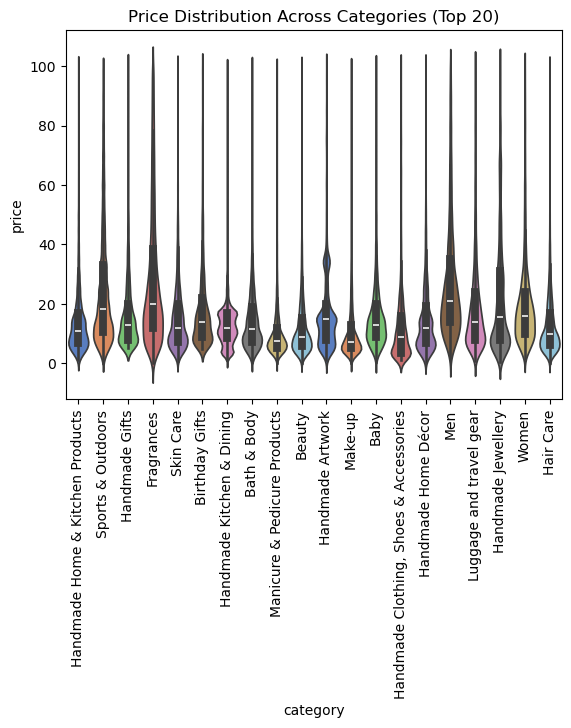

In [11]:
# Violin Plot without outliers
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)],
            x='category', y='price', palette='muted')
plt.xticks(rotation=90)
plt.title('Price Distribution Across Categories (Top 20)')
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_45764\537134989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['category'].isin(top_20_categories)],


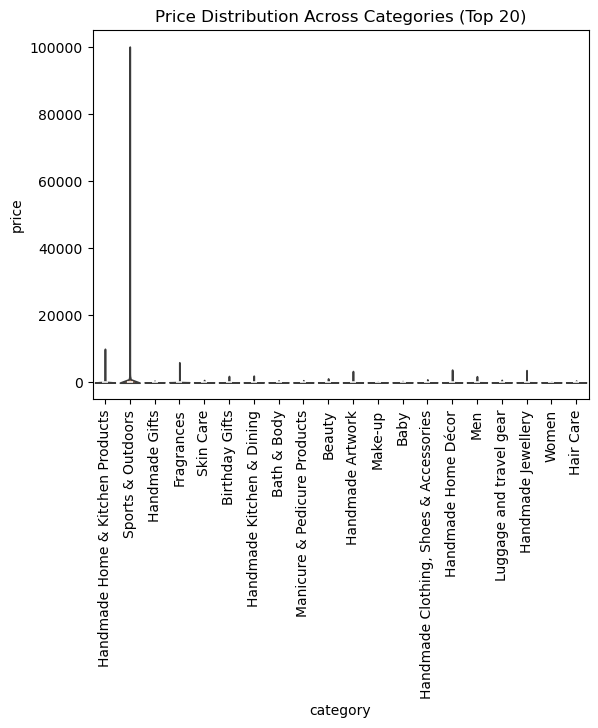

In [12]:
# Violin Plot with outliers
top_20_categories = df['category'].value_counts().head(20).index
sns.violinplot(data=df[df['category'].isin(top_20_categories)],
            x='category', y='price', palette='muted')
plt.xticks(rotation=90)
plt.title('Price Distribution Across Categories (Top 20)')
plt.show()

In [13]:
# Highest Median Price without outliers
median_prices = df_no_outliers.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
print(f"Category with highest median price: {highest_median_category}")

Category with highest median price: Desktop PCs


In [14]:
# Highest Median Price with outliers
median_prices = df.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
print(f"Category with highest median price: {highest_median_category}")

Category with highest median price: Laptops


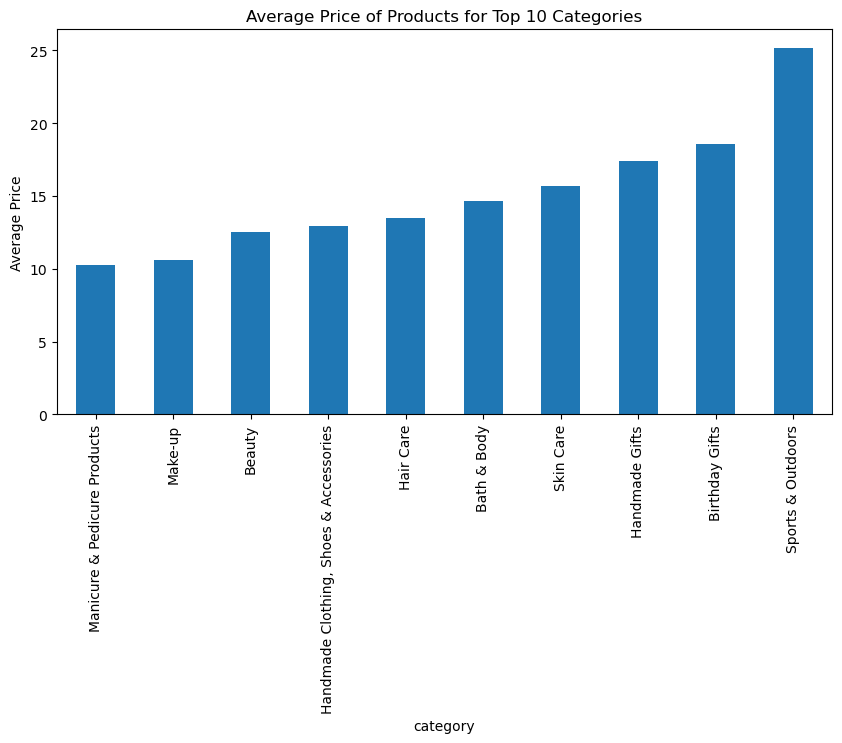

In [15]:
# Bar Chart for Average Price without outliers
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_prices = df_no_outliers.groupby('category')['price'].mean()
avg_prices.loc[top_10_categories].sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Price of Products for Top 10 Categories')
plt.ylabel('Average Price')
plt.show()

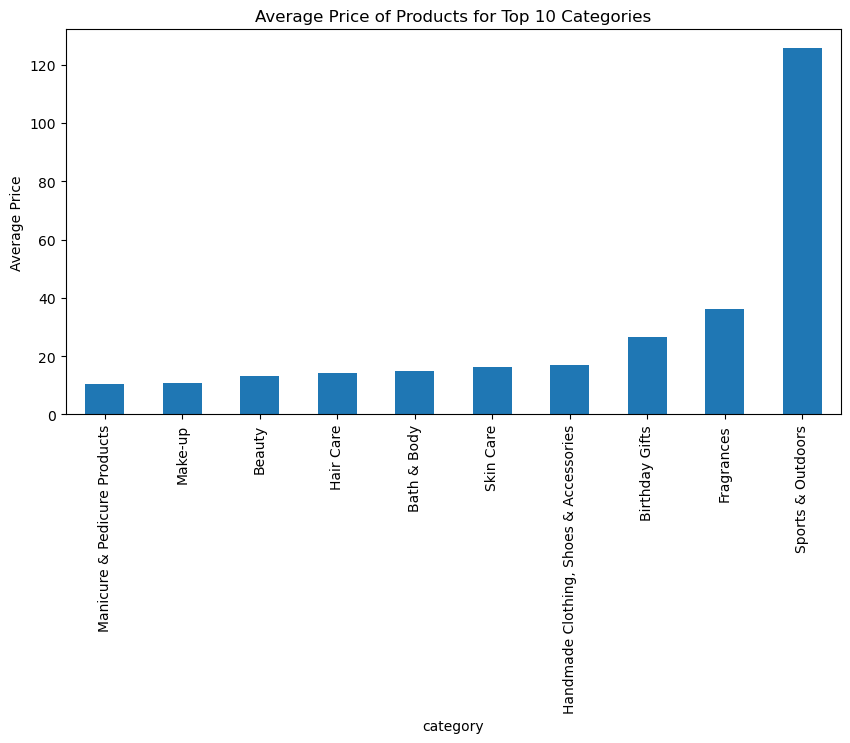

In [16]:
# Bar Chart for Average Price with outliers
top_10_categories = df['category'].value_counts().head(10).index
avg_prices = df.groupby('category')['price'].mean()
avg_prices.loc[top_10_categories].sort_values().plot(kind='bar', figsize=(10, 5))
plt.title('Average Price of Products for Top 10 Categories')
plt.ylabel('Average Price')
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_45764\3321235090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)],


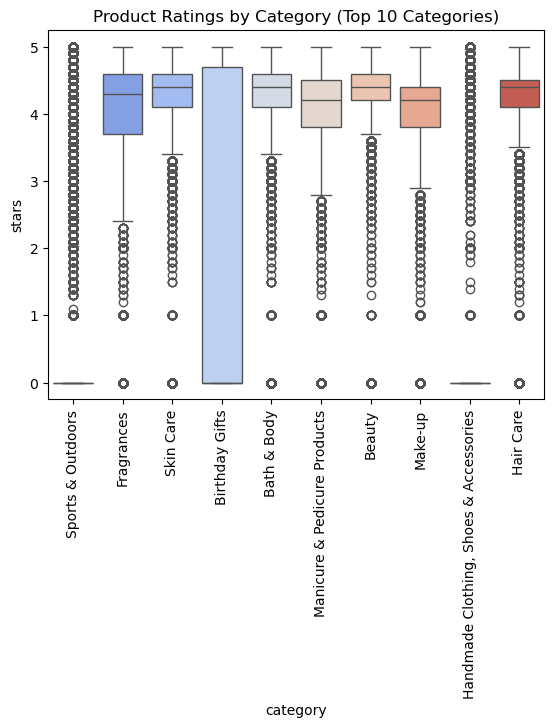

In [17]:
# Box Plot for Ratings without outliers
sns.boxplot(data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)],
            x='category', y='stars', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Product Ratings by Category (Top 10 Categories)')
plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_45764\3003581057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['category'].isin(top_10_categories)],


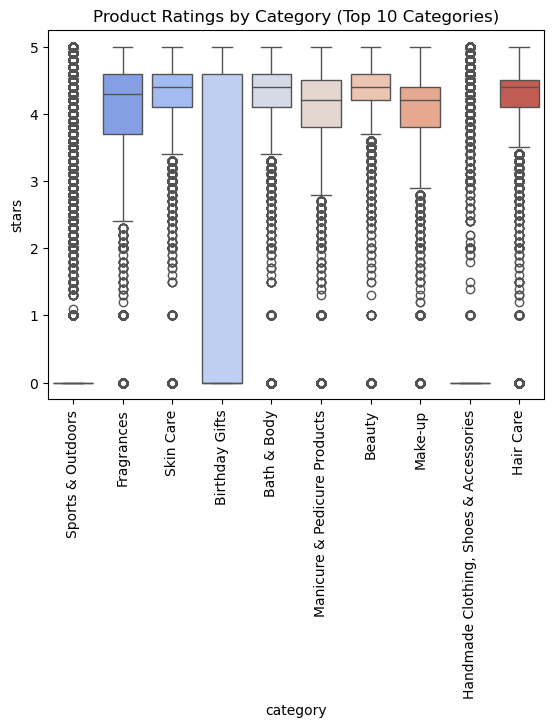

In [18]:
# Box Plot for Ratings with outliers
sns.boxplot(data=df[df['category'].isin(top_10_categories)],
            x='category', y='stars', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Product Ratings by Category (Top 10 Categories)')
plt.show()

In [19]:
# Highest Median Rating
median_ratings = df.groupby('category')['stars'].median()
highest_rating_category = median_ratings.idxmax()
print(f"Category with highest median rating: {highest_rating_category}")

Category with highest median rating: Computer Memory


## Part 3: Investigating the Interplay Between Product Prices and Ratings

In [20]:
# Convert 'category' to numeric using label encoding
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])


# Calculate Spearman correlation
correlation = df['category_encoded'].corr(df['stars'])
print(f"Correlation between category and stars: {correlation}")


Correlation between category and stars: -0.3066997451165178


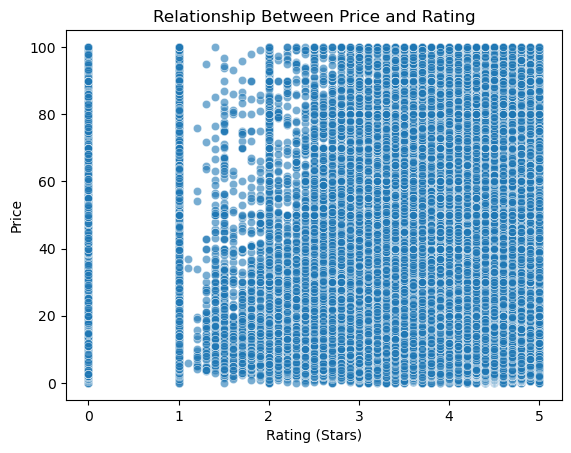

In [22]:
# Scatter Plot
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.6)
plt.title('Relationship Between Price and Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Price')
plt.show()

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')


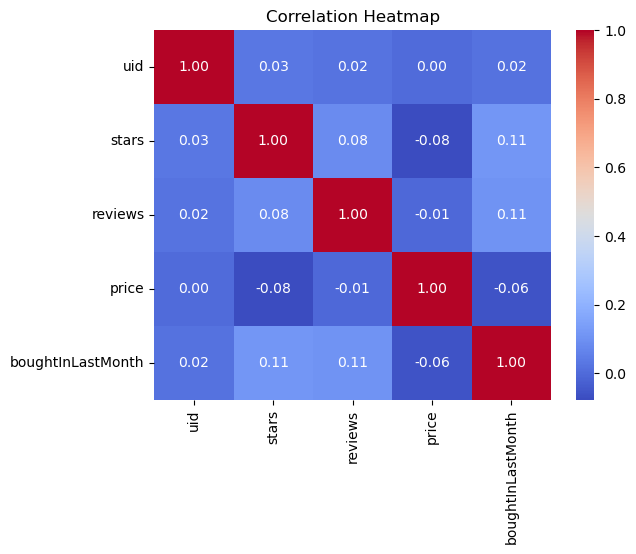

In [27]:
numeric_columns = df_no_outliers.select_dtypes(include=['float64', 'int64'])
print(numeric_columns.columns)  # Verify the selected columns

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
import statsmodels.api as sm  # Import statsmodels

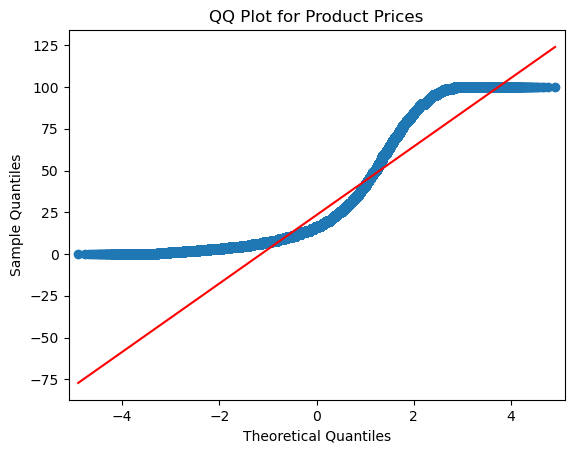

In [30]:
# QQ Plot for Normality Check
sm.qqplot(df_no_outliers['price'], line='s')
plt.title('QQ Plot for Product Prices')
plt.show()